# Welcome to the notebook for ATOC NWP：Make Cross-Section Graphs

In [1]:
import os
import csv
import glob
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr     
import datetime              
import cartopy.crs as ccrs          # For plotting maps
import cartopy.feature as cfeature  # For plotting maps
import pandas as pd                 # A quick way to deal with time stamps
import wrf
from datetime import datetime
from wrf import (getvar, interplevel, vertcross, 
                 vinterp, ALL_TIMES, extract_global_attrs)
import netCDF4 as nc

print('Done')

Done


In [2]:
def destagger(var, stagger_dim):
    '''
    From wrf-python https://github.com/NCAR/wrf-python/blob/b40d1d6e2d4aea3dd2dda03aae18e268b1e9291e/src/wrf/destag.py 
    '''
    var_shape = var.shape
    num_dims = var.ndim
    stagger_dim_size = var_shape[stagger_dim]

    full_slice = slice(None)
    slice1 = slice(0, stagger_dim_size - 1, 1)
    slice2 = slice(1, stagger_dim_size, 1)

    dim_ranges_1 = [full_slice] * num_dims
    dim_ranges_2 = [full_slice] * num_dims

    dim_ranges_1[stagger_dim] = slice1
    dim_ranges_2[stagger_dim] = slice2

    result = .5*(var[tuple(dim_ranges_1)] + var[tuple(dim_ranges_2)])

    return result

In [3]:
ds = xr.open_mfdataset("/projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-25_00:00:00")
lats = ds['XLAT'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
longs = ds['XLONG'].isel(Time=0)
min_lat = ds['XLAT'].values.min()
max_lat = ds['XLAT'].values.max()
min_lon = ds['XLONG'].values.min()
max_lon = ds['XLONG'].values.max()
MAP_BOUNDS = [min_lon, max_lon, min_lat, max_lat]
times = ds['XTIME'].values
print(MAP_BOUNDS)

[-108.85689, -72.02777, 16.425804, 40.822296]


In [4]:
WRF_DIRECTORY_NWF = "/projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1"
WRF_FILES_NWF = sorted([f for f in glob.glob(WRF_DIRECTORY_NWF+"/wrfout_d01_*")])
_WRF_FILES_NWF = [os.path.abspath(
                  os.path.join(WRF_DIRECTORY_NWF, f)) for f in WRF_FILES_NWF]

In [5]:
# Define empty array of SLP lats and longs

u =[]
v =[]
Times = []
new_test = []

# Loop through each file

for f in WRF_FILES_NWF[28:49]:
    print('Reading ',f)
    df  = nc.Dataset(f)
    start = f.find('d01_') + 4
    test = f[start:] 
    u.append(df['U'][:])
    v.append(df['V'][:])
    new_test = datetime.strptime(test, '%Y-%m-%d_%H:%M:%S')
    Times.append(new_test)
    
    
    
u = np.squeeze(u)
v = np.squeeze(v)
Times = np.squeeze(Times)

# unstagger velocities after reading everything in

u_destag = destagger(u, 3)
v_destag = destagger(v, 2)

# print('U:',np.shape(u_destag))
# print('V:',np.shape(v_destag))

u = u_destag # could probably have done this in one line with the destagger call
v = v_destag
ws = (u**2 + v**2)**0.5

Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_18:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_21:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_00:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_03:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_06:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_09:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation

In [6]:
height =[]

for f in WRF_FILES_NWF[28:49]:
    print('Reading ',f)
    df  = nc.Dataset(f)
    height.append((df['PH'][:]+ds['PHB'][:])/9.81 - ds['HGT'][:])

height = np.squeeze(height)
height_destag = destagger(height, 1)
height = height_destag

Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_18:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_21:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_00:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_03:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_06:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_09:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation

In [7]:
xtime =[]

for f in WRF_FILES_NWF[28:49]:
    print('Reading ',f)
    df  = nc.Dataset(f)
    xtime.append(df['XTIME'][:])

xtime = np.squeeze(xtime)

Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_18:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_21:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_00:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_03:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_06:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_09:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation

In [8]:
km_lon = 85 #at 25.89 N, 100 km at 40 deg N, 85 km per degree of longitude
km_lat = 111 # 111 km per degree of latitude
 
# desired_lon = -94.222610
# desired_lat = 29.668834

desired_lon = -93.71394
desired_lat = 29.633652

# desired_lon = -93.99438
# desired_lat = 29.633652

guess = 0.5 * np.size(longs[0,:]) + 1
print(np.round(guess))
south_north_index_2=155 # guess as half the domain dimension+1
west_east_index_2=162
this_lat_2 = ds['XLAT'].isel(Time=0,south_north=south_north_index_2,west_east=west_east_index_2)
this_lon_2 = ds['XLONG'].isel(Time=0,south_north=south_north_index_2,west_east=west_east_index_2)

dist_2 = np.sqrt(np.square(abs(km_lon*(longs[:,:] - desired_lon))) 
                    + np.square(abs(km_lat*(lats[:,:] - desired_lat))))
print("Closest point is distance: ",np.round(np.min(dist_2).values,3)," km")
print("This point is distance: ",np.round(np.sqrt(np.square(abs(km_lon*(this_lon_2.values - desired_lon))) 
                    + np.square(abs(km_lat*(this_lat_2.values - desired_lat)))),2), " km")

198.0
Closest point is distance:  0.0  km
This point is distance:  9.01  km


(21, 39, 302, 395)
(21, 39)
(39, 21)


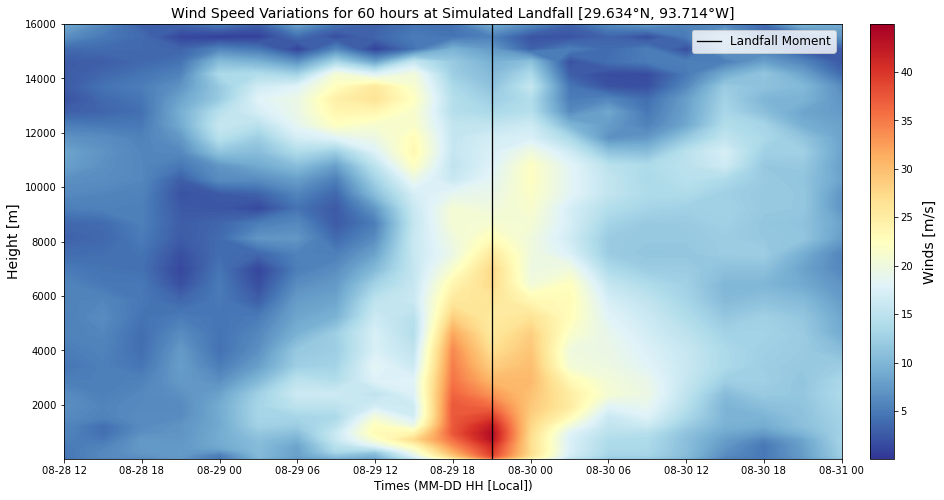

In [9]:


desired_lon = -94.222610
desired_lat = 29.668834

#ind_max_s = np.unravel_index(np.argmin(dist, axis=None), dist.shape)
# Not working....
ind_max_s=[155,162] 

#Now create a contour plot of time on the x-axis and height on the y-axis

fig, ax = plt.subplots(1,1,figsize=(16,8), sharex=True, sharey=True)
c_levels = np.arange(0, 45, 0.05)
fig.patch.set_facecolor('white')                   
    
time_axis = xtime

winds = ws[:,:,ind_max_s[0],ind_max_s[1]]
# print(np.min(winds),np.max(winds))
print(np.shape(ws))
print(np.shape(winds))
windst = np.transpose(winds)
print(np.shape(windst))

im = ax.contourf(
#   time_axis/60,
    Times,
    height[0,:,ind_max_s[0],ind_max_s[1]],
    windst, c_levels,
    cmap=plt.cm.RdYlBu_r)

plt.axvline(x=Times[11], color='k', linewidth='1.3', label='Landfall Moment')
#plt.axhline(y=15000, color='r', linewidth='1.4', label='Tropopause at ~15 km')
ax.set_title("Wind Speed Variations for 60 hours at Simulated Landfall [29.634°N, 93.714°W]", fontsize=14)
# ax.set_xlabel("Times (hour after "+ds.SIMULATION_START_DATE)
ax.set_xlabel("Times (MM-DD HH [Local])", fontsize=12)
ax.set_ylabel("Height [m]", fontsize=14)
ax.set_ylim(20,16000)
ax.legend(prop={'size': 12})

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.825,.124,.02,.756])                                                            
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Winds [m/s]", fontsize=14, labelpad=10)
cbar.set_ticks([5,10,15,20,25,30,35,40,45])

plt.show()

## Testing

In [5]:
# Define empty array of SLP lats and longs

Times = []
new_test = []

# Loop through each file

for f in WRF_FILES_NWF[28:49]:
    print('Reading ',f)
    df  = nc.Dataset(f)
    start = f.find('d01_') + 4
    test = f[start:] 
    new_test = datetime.strptime(test, '%Y-%m-%d_%H:%M:%S')
    Times.append(new_test)

Times = np.squeeze(Times)

Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_18:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_21:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_00:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_03:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_06:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_09:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation

In [6]:
height =[]

for f in WRF_FILES_NWF[28:49]:
    print('Reading ',f)
    df  = nc.Dataset(f)
    height.append((df['PH'][:]+ds['PHB'][:])/9.81 - ds['HGT'][:])

height = np.squeeze(height)
height_destag = destagger(height, 1)
height = height_destag

Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_18:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_21:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_00:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_03:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_06:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_09:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation

In [7]:
xtime =[]

for f in WRF_FILES_NWF[28:49]:
    print('Reading ',f)
    df  = nc.Dataset(f)
    xtime.append(df['XTIME'][:])

xtime = np.squeeze(xtime)

Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_18:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_21:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_00:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_03:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_06:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_09:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation

In [8]:
rh = []

for f in WRF_FILES_NWF[28:49]:
    print('Reading ',f)
    df  = nc.Dataset(f)
    rhu = getvar(df, "rh", method='cat')
    rh.append(rhu)
rh=np.squeeze(rh)

Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_18:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-28_21:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_00:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_03:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_06:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_09:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_12:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_15:00:00
Reading  /projects/jiko1138/ATOC_3030/Project/Ida/Simulation

(21, 39)
(39, 21)


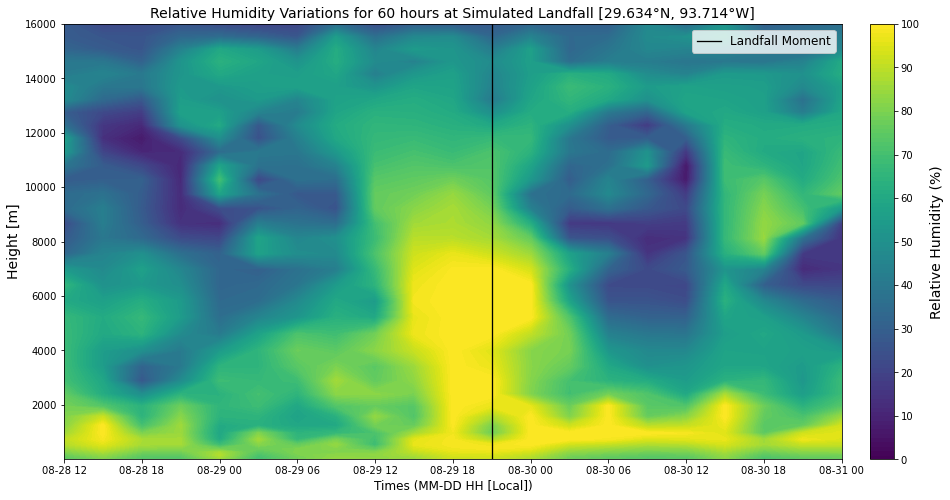

In [9]:


desired_lon = -94.222610
desired_lat = 29.668834

#ind_max_s = np.unravel_index(np.argmin(dist, axis=None), dist.shape)
# Not working....
ind_max_s=[155,162] 

#Now create a contour plot of time on the x-axis and height on the y-axis

fig, ax = plt.subplots(1,1,figsize=(16,8), sharex=True, sharey=True)
c_levels = np.arange(0, 100.1, 1)
fig.patch.set_facecolor('white')                   
    
time_axis = xtime

winds = rh[:,:,ind_max_s[0],ind_max_s[1]]
# print(np.min(winds),np.max(winds))
print(np.shape(winds))
windst = np.transpose(winds)
print(np.shape(windst))

im = ax.contourf(
#   time_axis/60,
    Times,
    height[0,:,ind_max_s[0],ind_max_s[1]],
    windst, c_levels,
    cmap=plt.cm.viridis)

plt.axvline(x=Times[11], color='k', linewidth='1.3', label='Landfall Moment')
#plt.axhline(y=15000, color='r', linewidth='1.4', label='Tropopause at ~15 km')
ax.set_title("Relative Humidity Variations for 60 hours at Simulated Landfall [29.634°N, 93.714°W]", fontsize=14)
# ax.set_xlabel("Times (hour after "+ds.SIMULATION_START_DATE)
ax.set_xlabel("Times (MM-DD HH [Local])", fontsize=12)
ax.set_ylabel("Height [m]", fontsize=14)
ax.set_ylim(20,16000)
ax.legend(prop={'size': 12})

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.825,.124,.02,.756])                                                            
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Relative Humidity (%)", fontsize=14, labelpad=10)
cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100])

plt.show()